# 8 - Metropolis Algorithm for the Ising Model

##### Imports:

In [166]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import copy

##### Functions:

In [2]:
def random_spins(N):
    '''Generate a N x N random lattice of spins, represented as a vector of length N^2.'''
    spins = [-1, 1]
    
    lattice = []
    for i in range(N**2):
        lattice.append(random.choice(spins))
    
    return lattice

In [37]:
def generate_exponentials(T):
    delta_E = [4, 8]
    exponentials = {}
    for E in delta_E:
        exponentials[str(E)] = np.exp(-E/T)
    return exponentials

In [245]:
def flip_spin(lattice, N, T):
    
    i = random.randint(0, N**2 - 1)
    s = lattice[i]
    
    # Initial energy
    E_i = 0
    E_i += - s*lattice[(i + N + N**2)%N**2]
    E_i += - s*lattice[(i -  N + N**2)%N**2]
        
    E_i += - s*lattice[(i + 1 + N**2)%N**2]
    E_i += - s*lattice[(i -  1 + N**2)%N**2]
    
    
    # Final energy:
    E_f = - E_i
    
    delta_E = -2*E_i
    
    if delta_E <= 0:
        lattice[i] = -s
        return lattice
    
    r = random.uniform(0, 1)
    key = str(delta_E)

    if r <= exponentials[key]:
        lattice[i] = -s
        return lattice
        
    return lattice

In [249]:
test = generate_exponentials(0.2)
print(test)

{'4': 2.061153622438558e-09, '8': 4.248354255291589e-18}


In [329]:
def compute_magnetisation(lattice, N):
    return abs(np.sum(lattice))/(N**2)

In [330]:
def iteration_energy(N, T, nreps = 10**3):
    lattice = random_spins(N)
    exponentials = generate_exponentials(T)
    
    m_list = [compute_energy(lattice)]
    
    for i in range(nreps):
        new_lattice = flip_spin(lattice, N, T)
        m_list.append(compute_energy(lattice))
        lattice = new_lattice
        
    return m_list

In [331]:
def iteration_magnetisation(N, T, nreps = 10**3):
    lattice = random_spins(N)
    exponentials = generate_exponentials(T)

    m_list = [compute_energy(lattice)]
    
    for i in range(nreps):
        new_lattice = flip_spin(lattice, N, T)
        m_list.append(compute_magnetisation(new_lattice, N))
        lattice = new_lattice
        
    return m_list

In [332]:
def compute_energy(lattice):
    '''Given a lattice, computes the energy according to Hamiltonian for the Ising model.'''
    E = 0
    N = int(np.sqrt(len(lattice))) # obtain N, given the lattice
    
    for i in range(len(lattice)):
        s = lattice[i]
        E += -s*lattice[(i + N + N**2)%N**2]
        E += -s*lattice[(i -  N + N**2)%N**2]
        
        E += -s*lattice[(i + 1 + N**2)%N**2]
        E += -s*lattice[(i -  1 + N**2)%N**2]
    return E/(4*N**2)

## 8.1 - Magnetisation per spin

Set-up of the problem:

In [333]:
# Critical temperature
TC = 2/np.log(1 + np.sqrt(2))

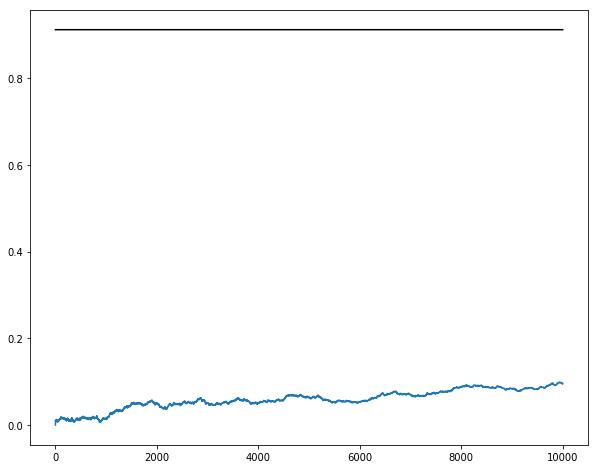

In [338]:
# Calculate magnetisation
T = 2; N = 50; 
nreps = 10000
m_list = iteration_magnetisation(N, T, nreps)

# Plot the result
plt.subplots(figsize =(10, 8))
plt.plot(list(range(nreps + 1)), m_list)
t = np.arange(0, nreps, 0.01)
m_exact = (1 - (np.sinh(2/T))**(-4))**(1/8)
y = [m_exact for val in t]
plt.plot(t, y, color = 'black', label = 'Exact')
plt.show()

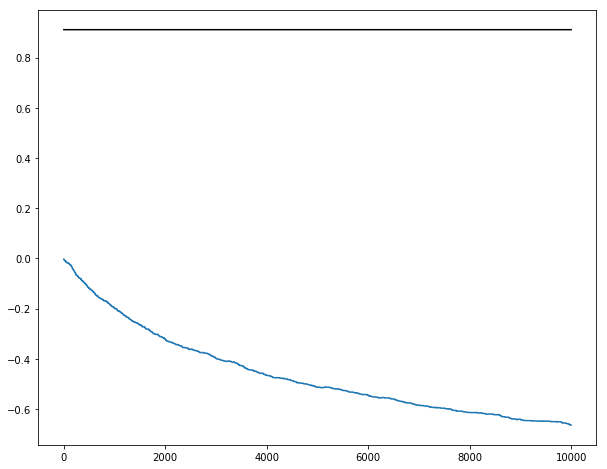

In [339]:
# Calculate magnetisation
T = 2; N = 50; 
nreps = 10000
m_list = iteration_energy(N, T, nreps)

# Plot the result
plt.subplots(figsize =(10, 8))
plt.plot(list(range(nreps + 1)), m_list)

plt.plot(t, y, color = 'black', label = 'Exact')
plt.show()

### Test place

In [187]:
ground_state = [1, 1, 1, 1, 1, 1, 1, 1, 1] # ground state for N = 3

In [188]:
compute_magnetisation(ground_state, 3)

1.0

In [272]:
state = [1, -1, 1, -1, 1, -1, 1, -1, 1]

In [302]:
result = flip_spin(state, 3, 2)
print(state)
print(result)

[1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
